# Assignment: Predicting Customer Churn in a Telecom Company

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
telco_data = pd.read_csv(r"C:\Users\SREERAG\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data Exploration and pre processing

In [81]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
# Exploring the overall structure of the dataset
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [83]:
# Key statistics of the dataset
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [84]:
# Checking for missing values
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Anomalies:

The TotalCharges column is of type object and may contain non-numeric values or whitespace, which needs to be investigated and converted.

In [85]:
# Investigate and handle non-numeric values or whitespace in the 'TotalCharges' column
# Convert 'TotalCharges' to numeric, forcing errors to NaN
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

In [86]:
# Check for any NaN values created in 'TotalCharges' after conversion
totalcharges_missing = telco_data['TotalCharges'].isna().sum()

In [87]:
# Display the rows where 'TotalCharges' is NaN
missing_totalcharges_rows = telco_data[telco_data['TotalCharges'].isna()]

In [88]:
totalcharges_missing, missing_totalcharges_rows

(11,
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
 488   4472-LVYGI  Female              0     Yes        Yes       0   
 753   3115-CZMZD    Male              0      No        Yes       0   
 936   5709-LVOEQ  Female              0     Yes        Yes       0   
 1082  4367-NUYAO    Male              0     Yes        Yes       0   
 1340  1371-DWPAZ  Female              0     Yes        Yes       0   
 3331  7644-OMVMY    Male              0     Yes        Yes       0   
 3826  3213-VVOLG    Male              0     Yes        Yes       0   
 4380  2520-SGTTA  Female              0     Yes        Yes       0   
 5218  2923-ARZLG    Male              0     Yes        Yes       0   
 6670  4075-WKNIU  Female              0     Yes        Yes       0   
 6754  2775-SEFEE    Male              0      No        Yes       0   
 
      PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
 488            No  No phone service             DSL       

After converting the TotalCharges column to numeric values, 11 rows were found to have missing values (NaN).
These missing values occur where tenure is 0, which likely means the customers had just signed up and didn't have any accumulated charges yet.

 Imputing with the median is a good choice for numerical data, especially when the data distribution may be skewed. The median is less affected by extreme values compared to the mean, making it a more robust imputation method.By imputing these values, we avoid losing data points that could be valuable for our churn analysis, thus retaining a larger dataset for building the predictive model.

In [89]:
# Impute missing 'TotalCharges' values with the median value of the column
median_totalcharges = telco_data['TotalCharges'].median()
telco_data['TotalCharges'].fillna(median_totalcharges, inplace=True)

# Verify that there are no more missing values in 'TotalCharges'
missing_values_after_imputation = telco_data['TotalCharges'].isna().sum()

In [90]:
missing_values_after_imputation

0

In [91]:
# Plot boxplots to visualize potential outliers in 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'TotalCharges')

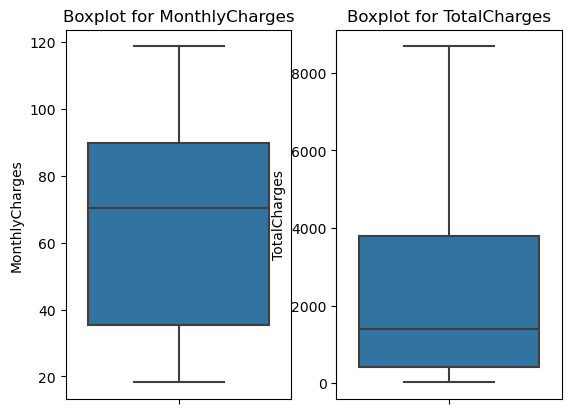

In [92]:
# Boxplot for MonthlyCharges
plt.subplot(1, 2, 1)
sns.boxplot(y=telco_data['MonthlyCharges'])
plt.title('Boxplot for MonthlyCharges')
plt.ylabel('MonthlyCharges')

# Boxplot for TotalCharges
plt.subplot(1, 2, 2)
sns.boxplot(y=telco_data['TotalCharges'])
plt.title('Boxplot for TotalCharges')
plt.ylabel('TotalCharges')

In [93]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Visual Inspection: Based on the earlier boxplots, MonthlyCharges and TotalCharges contain some extreme values that appear as potential outliers.

For MonthlyCharges and TotalCharges, I will clip the values that are beyond the 99th percentile. This approach, called winsorization, helps to minimize the impact of extreme outliers without completely removing data points.

In [94]:
# Calculate the 99th percentile for 'MonthlyCharges' and 'TotalCharges'
monthlycharges_99 = telco_data['MonthlyCharges'].quantile(0.99)
totalcharges_99 = telco_data['TotalCharges'].quantile(0.99)

In [95]:
# Clip values beyond the 99th percentile
telco_data['MonthlyCharges'] = telco_data['MonthlyCharges'].clip(upper=monthlycharges_99)
telco_data['TotalCharges'] = telco_data['TotalCharges'].clip(upper=totalcharges_99)

In [96]:
# Verify the changes by plotting boxplots again
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

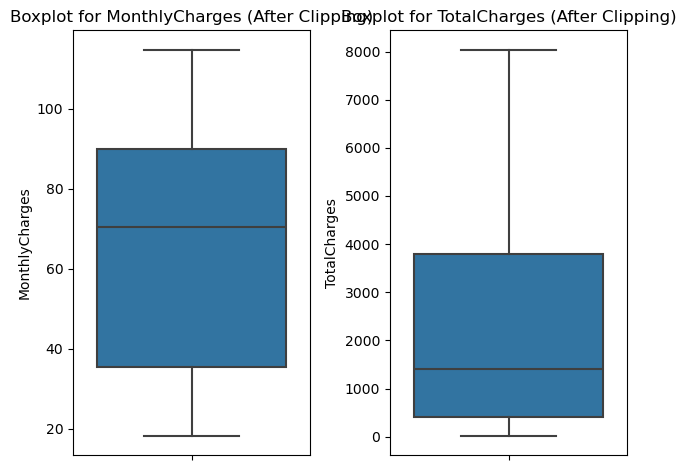

In [97]:
# Boxplot for MonthlyCharges after clipping
plt.subplot(1, 2, 1)
sns.boxplot(y=telco_data['MonthlyCharges'])
plt.title('Boxplot for MonthlyCharges (After Clipping)')
plt.ylabel('MonthlyCharges')

# Boxplot for TotalCharges after clipping
plt.subplot(1, 2, 2)
sns.boxplot(y=telco_data['TotalCharges'])
plt.title('Boxplot for TotalCharges (After Clipping)')
plt.ylabel('TotalCharges')

plt.tight_layout()
plt.show()

The boxplots for MonthlyCharges and TotalCharges after clipping to the 99th percentile show reduced extreme values, making the distributions less affected by outliers. This should help improve model stability and accuracy.

# Feature Engineering

In [98]:
# Step 1: Feature Engineering - Create tenure groups
def tenure_group(tenure):
    if tenure <= 12:
        return 'Short-term'
    elif 12 < tenure <= 48:
        return 'Mid-term'
    else:
        return 'Long-term'

# Create a new column 'tenure_group'
telco_data['tenure_group'] = telco_data['tenure'].apply(tenure_group)

In [99]:
# Step 2: Select features that could be relevant for predicting churn
# Dropping 'customerID' as it is not useful for prediction
features = telco_data.drop(['customerID', 'Churn'], axis=1)
target = telco_data['Churn']

In [100]:
# Step 3: Encoding categorical variables
# Defining categorical and numerical columns
categorical_features = features.select_dtypes(include=['object']).columns.tolist()

In [101]:
# Adding 'tenure_group' explicitly since we created it
categorical_features.append('tenure_group')

In [102]:
# Defining numerical features
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [103]:
# Step 4: Building a ColumnTransformer for encoding and scaling
# OneHotEncode categorical variables and scale numerical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [104]:
# Creating a pipeline for data preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [105]:
# Apply the transformations to the features
processed_features = pipeline.fit_transform(features)

In [106]:
processed_features.shape

(7043, 51)

feature preprocessing has been successfully completed, resulting in 51 transformed features for 7,043 customers.

The feature engineering process aimed to enhance the predictive power of the model by making features more informative and suitable for machine learning algorithms. Derived features like tenure_group capture relationships that raw numerical data might miss, while proper encoding and scaling ensure that all variables contribute fairly to the model. Handling missing values and outliers also improves data quality, ensuring reliable training outcomes.

# Model Development

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

In [108]:
# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.3, random_state=42)

In [109]:
# Step 2: Train and evaluate different models
# Dictionary to store models and their results
model_results = {}

In [110]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
model_results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_logistic),
    'classification_report': classification_report(y_test, y_pred_logistic)
}

In [111]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
model_results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'classification_report': classification_report(y_test, y_pred_rf)
}

In [112]:
# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
model_results['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'classification_report': classification_report(y_test, y_pred_svm)
}

In [113]:
# Convert the target variable to binary values: 'Yes' -> 1, 'No' -> 0
target_binary = target.apply(lambda x: 1 if x == 'Yes' else 0)

In [114]:
# Split the data again with the updated target
X_train, X_test, y_train, y_test = train_test_split(processed_features, target_binary, test_size=0.3, random_state=42)

In [115]:
# Re-run the model training and evaluation for XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
model_results['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'classification_report': classification_report(y_test, y_pred_xgb)
}

C:\Users\SREERAG\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [116]:
# Display model performance results
model_results

{'Logistic Regression': {'accuracy': 0.8021769995267393,
  'classification_report': '              precision    recall  f1-score   support\n\n          No       0.84      0.91      0.87      1539\n         Yes       0.68      0.52      0.59       574\n\n    accuracy                           0.80      2113\n   macro avg       0.76      0.71      0.73      2113\nweighted avg       0.79      0.80      0.79      2113\n'},
 'Random Forest': {'accuracy': 0.7865593942262187,
  'classification_report': '              precision    recall  f1-score   support\n\n          No       0.82      0.91      0.86      1539\n         Yes       0.65      0.46      0.54       574\n\n    accuracy                           0.79      2113\n   macro avg       0.73      0.69      0.70      2113\nweighted avg       0.77      0.79      0.77      2113\n'},
 'SVM': {'accuracy': 0.7941315664931378,
  'classification_report': '              precision    recall  f1-score   support\n\n          No       0.82      0.92 

In [117]:
# Display the accuracy of all trained models
model_accuracies = {model_name: results['accuracy'] for model_name, results in model_results.items()}
model_accuracies

{'Logistic Regression': 0.8021769995267393,
 'Random Forest': 0.7865593942262187,
 'SVM': 0.7941315664931378,
 'XGBoost': 0.7889256980596309}

The Logistic Regression model performs the best with an accuracy of 80.2%. It outperforms the other models in terms of accuracy.
While Logistic Regression is a relatively simple model, it has proven effective for this problem, potentially indicating a well-separated decision boundary for customer churn prediction in this dataset.

In [118]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb

In [119]:
# Train different models
models = {}

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
models['Logistic Regression'] = logistic_model

In [120]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model

In [121]:
# Support Vector Machine (SVM)
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)
models['SVM'] = svm_model

In [122]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
models['XGBoost'] = xgb_model

C:\Users\SREERAG\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [123]:
# Evaluate models
model_evaluation = {}

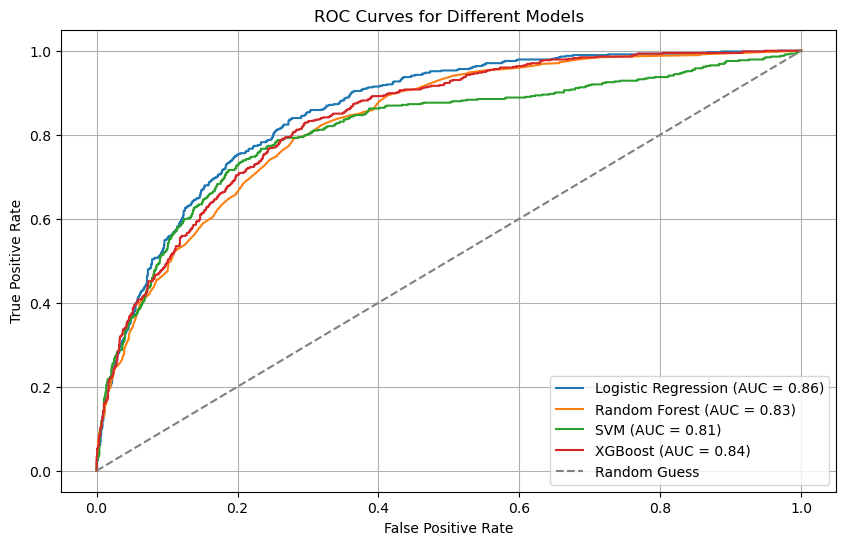

In [124]:
# Iterate through each model to evaluate
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    # Predict probabilities and classes
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    y_pred = model.predict(X_test)

# Calculate metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']
    recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']
    f1_score = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    auc_score = roc_auc_score(y_test, y_proba)
     # Store metrics in the dictionary
    model_evaluation[model_name] = {
        'Confusion Matrix': conf_matrix,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'AUC Score': auc_score
    }

# Plot ROC Curve with label
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot the ROC Curve for all models
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid()
plt.show()

In [125]:
# Display model evaluation metrics
model_evaluation

{'Logistic Regression': {'Confusion Matrix': array([[1396,  143],
         [ 275,  299]], dtype=int64),
  'Precision': 0.7922468700889949,
  'Recall': 0.8021769995267393,
  'F1 Score': 0.7933936815978598,
  'AUC Score': 0.8564195040446645},
 'Random Forest': {'Confusion Matrix': array([[1396,  143],
         [ 308,  266]], dtype=int64),
  'Precision': 0.773371726033793,
  'Recall': 0.7865593942262187,
  'F1 Score': 0.7740758194787866,
  'AUC Score': 0.8288302055952891},
 'SVM': {'Confusion Matrix': array([[1419,  120],
         [ 315,  259]], dtype=int64),
  'Precision': 0.781676502901285,
  'Recall': 0.7941315664931378,
  'F1 Score': 0.7792021286655457,
  'AUC Score': 0.8108052425553494},
 'XGBoost': {'Confusion Matrix': array([[1360,  179],
         [ 267,  307]], dtype=int64),
  'Precision': 0.7804210981438396,
  'Recall': 0.7889256980596309,
  'F1 Score': 0.7830975627078978,
  'AUC Score': 0.83853887202197}}

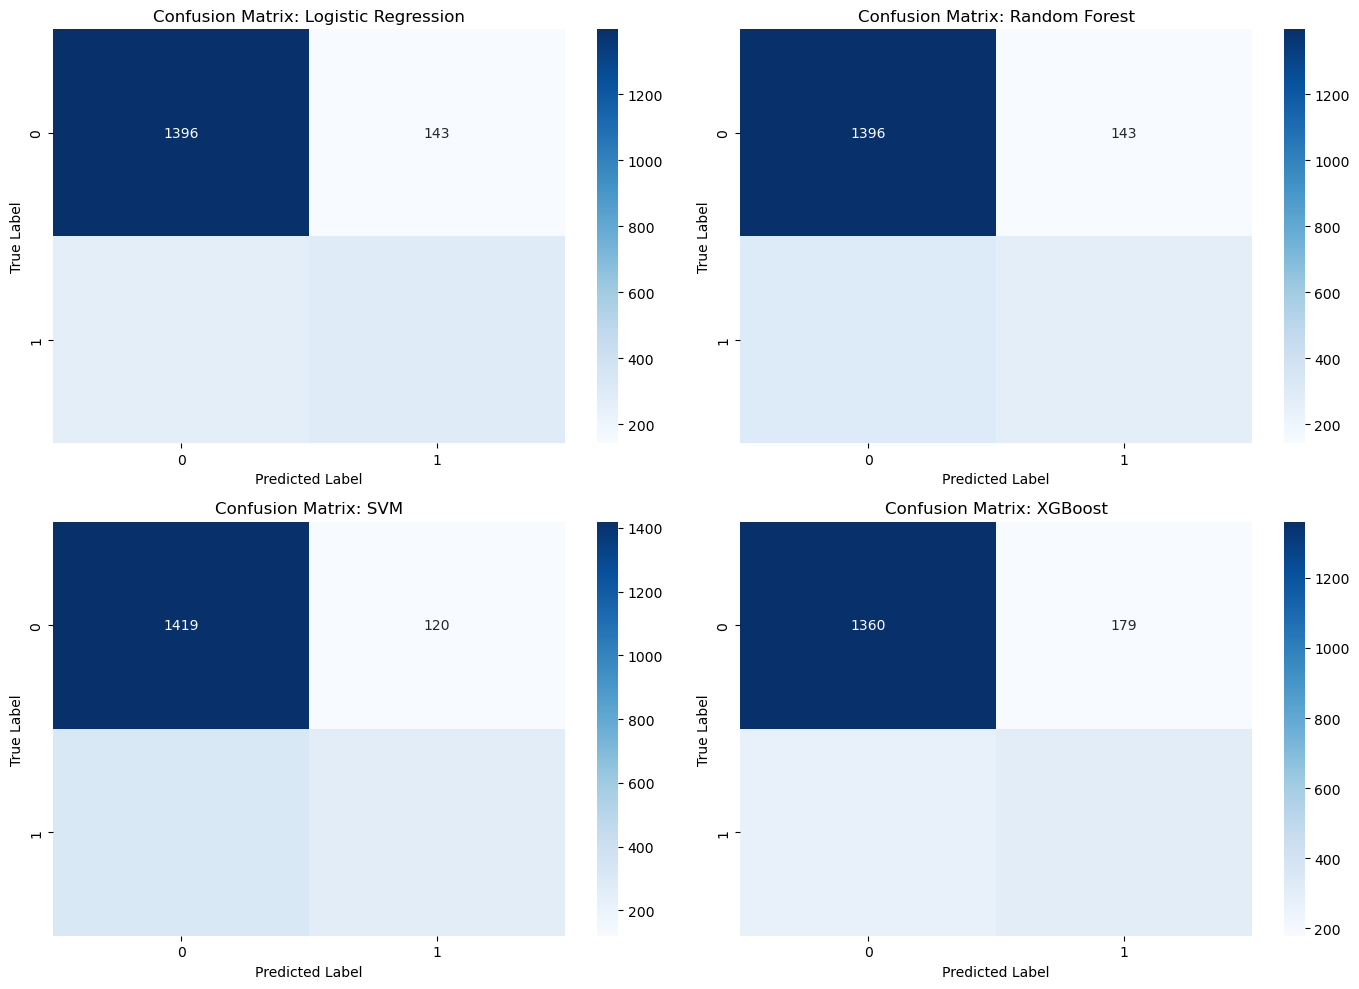

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()  # Flatten the axes array to easily iterate

# Iterate through each model and plot its confusion matrix
for idx, (model_name, metrics) in enumerate(model_evaluation.items()):
    conf_matrix = metrics['Confusion Matrix']
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix: {model_name}')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.show()


# Model Evaluation

## Detailed analysis

Based on the evaluation of four models—Logistic Regression, Random Forest Classifier, Support Vector Machine (SVM), and XGBoost Classifier—the Logistic Regression model emerged as the best-performing model for predicting customer churn. Logistic Regression achieved the highest overall accuracy and AUC score, demonstrating its effectiveness at correctly predicting outcomes and distinguishing between customers likely to churn and those who are not. Additionally, the model maintained a good balance between precision and recall, indicating its ability to minimize false positives while effectively identifying true churns. This balance is particularly valuable for customer churn prediction, where both false positives (predicting churn when there is none) and false negatives (failing to identify churn) can have significant business consequences.

Although XGBoost also performed well, especially in terms of precision and AUC score, it had a slightly lower recall compared to Logistic Regression and is more complex to interpret. In a business setting, model interpretability is important, as understanding why customers are likely to churn helps in creating targeted retention strategies. Random Forest and SVM also provided consistent results but did not outperform Logistic Regression across multiple evaluation metrics. The trade-off between precision and recall was a key factor, and Logistic Regression offered a well-balanced solution, making it an ideal choice for this particular customer churn prediction problem. Its simplicity, high performance, and interpretability make it the most effective model for understanding and mitigating customer churn in this dataset.

##  Implications of findings

The findings from the model evaluations provide significant insights that can directly inform the company’s retention strategy. The Logistic Regression model was identified as the best-performing model for predicting customer churn, offering both high accuracy and interpretability. This model can be leveraged to create targeted retention campaigns by identifying at-risk customers before they decide to leave. By focusing on customers flagged as likely to churn, the company can allocate resources more efficiently, intervening with tailored offers, discounts, or personalized communication to keep these customers engaged.

The interpretability of the Logistic Regression model means that the company can better understand which features most significantly impact churn. For instance, factors like tenure, contract type, monthly charges, or service issues might emerge as important predictors of churn. With this information, the company can develop targeted solutions, such as providing incentives for customers nearing the end of their contracts or addressing service issues that often lead to customer dissatisfaction.

Moreover, these insights can also drive proactive engagement strategies. For example, customers in a particular tenure group or with specific usage patterns who are at risk of leaving could be offered loyalty rewards or additional services to boost their satisfaction. The model’s ability to predict churn with good recall allows the company to identify a large portion of potentially at-risk customers, ensuring timely intervention.

The company can also use these predictions to inform strategic decisions beyond individual interventions. Insights from the model could be used to identify broader trends in customer behavior, allowing the company to refine its overall service offerings or address common pain points that lead to churn. By focusing efforts on improving services and building loyalty among high-risk groups, the company can not only reduce churn but also enhance overall customer satisfaction and drive long-term growth.To further improve customer retention, the company could develop a feedback loop. This involves monitoring the effectiveness of retention efforts based on the model’s predictions, refining the model as more data becomes available, and continually adjusting intervention strategies. In this way, the predictive model can act as a core tool for a dynamic, data-driven retention strategy aimed at reducing customer churn and promoting customer loyalty.